In [1]:
GAMEWEEK =38
#'''Provide Game week number here'''




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

GW = GAMEWEEK
path = '/content/drive/MyDrive/fpl_temp/'+str(GW)+'/Goals_and_assist_GW'+str(GW)+'.csv'
df = pd.read_csv(path)
path = '/content/drive/MyDrive/fpl_temp/'+str(GW)+'/Player_selection_GW'+str(GW)+'.csv'
df1 = pd.read_csv(path)
player_name = dict(zip(df['id'], df['Player']))
goals = dict(zip(df['id'], df['Goals']))
assists = dict(zip(df['id'], df['Assists']))
points = dict(zip(df['id'], df['Point']))

for index,row in df1.iterrows():
    list1 = []
    for i in range(0,11,1):
        kheladi = row[str(i)]
        list1.append(kheladi)
    found_values = [goals[item] for item in list1 if item in goals]
    sum1 = sum(found_values)
    df1.at[index,'G'] = sum1
    found_values = [assists[item] for item in list1 if item in assists]
    sum1 = sum(found_values)
    df1.at[index,'A'] = sum1
    df1.at[index,'Captain'] = player_name[row['captain']]
    df1.at[index,'C_P'] = points[row['captain']]

df2 = df1[['Manager','Captain','C_P','G','A','GW_P','E_T']]
df2['Net_GW'] = df2['GW_P'] + df2['E_T']
df2['N_G_W'] = df2['Net_GW'] + df2['E_T']*0.1/4

sorting_columns = ['N_G_W','E_T','C_P','G']
sorting_ascending = [False,True,False,False]
sorted_df = df2.sort_values(by = sorting_columns,ascending = sorting_ascending)
sorted_df['Score_Rank'] = sorted_df['N_G_W'].rank(method='min', ascending=False)
df = sorted_df
duplicates = df[df.duplicated(subset='Score_Rank', keep=False)]['Score_Rank'].unique()
duplicates
if len(duplicates) != 0:
    i = 0
    for x in duplicates:
        df_d = df[df['Score_Rank'] == x]
        df_d['Captain_Rank'] = df_d['C_P'].rank(method='min', ascending=False)
        df_d['Captain_Rank'] = df_d['Captain_Rank'] -1
        df_d = df_d[['Manager','Captain_Rank']]
        if i == 0:
            dfff = df_d
        else:
            dfff = pd.concat([dfff, df_d], ignore_index=True)
        i = i+1

    sorted_df = pd.merge(sorted_df,dfff,on = 'Manager',how ='left')
    sorted_df['Score_Rank'] = sorted_df['Score_Rank']+sorted_df['Captain_Rank'].fillna(0)
    sorted_df.drop(columns='Captain_Rank',inplace = True)

duplicates = sorted_df[sorted_df.duplicated(subset='Score_Rank', keep=False)]['Score_Rank'].unique()
duplicates
if len(duplicates) != 0:
    i = 0
    for x in duplicates:
        df_d = sorted_df[sorted_df['Score_Rank'] == x]
        df_d['Goal_Rank'] = df_d['G'].rank(method='min', ascending=False)
        df_d['Goal_Rank'] = df_d['Goal_Rank'] -1
        df_d = df_d[['Manager','Goal_Rank']]
        if i == 0:
            dfff = df_d
        else:
            dfff = pd.concat([dfff, df_d], ignore_index=True)
        i = i+1
    sorted_df = pd.merge(sorted_df,dfff,on = 'Manager',how ='left')
    sorted_df['Score_Rank'] = sorted_df['Score_Rank']+sorted_df['Goal_Rank'].fillna(0)
    sorted_df.drop(columns='Goal_Rank',inplace = True)
sorted_df.rename(columns = {'Score_Rank':'Rank'},inplace = True)
sorted_df['Rank'] = sorted_df['Rank'].astype(int)
sorted_df['G'] = sorted_df['G'].astype(int)
sorted_df['A'] = sorted_df['A'].astype(int)
sorted_df['GW_P'] = sorted_df['GW_P'].astype(int)
sorted_df['C_P'] = sorted_df['C_P'].astype(int)
sorted_df['Net_GW'] = sorted_df['Net_GW'].astype(int)
sorted_df['E_T'] = sorted_df['E_T'].astype(int)
df_df_df = sorted_df[['Rank','Manager','Captain','C_P','G','A','GW_P','E_T','Net_GW']]

<ipython-input-1-6c812add52ee>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Net_GW'] = df2['GW_P'] + df2['E_T']
<ipython-input-1-6c812add52ee>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['N_G_W'] = df2['Net_GW'] + df2['E_T']*0.1/4
<ipython-input-1-6c812add52ee>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [2]:
df2

,Manager,Captain,C_P,G,A,GW_P,E_T,Net_GW,N_G_W
0,Rebof Katwal,Cole Palmer,6.0,4.0,4.0,76.0,0.0,76.0,76.0
1,Shubham Datta,Erling Haaland,2.0,3.0,2.0,52.0,0.0,52.0,52.0
2,aadarsha kuinkel,Erling Haaland,2.0,3.0,5.0,60.0,0.0,60.0,60.0
3,Santosh Maharjan,Erling Haaland,2.0,7.0,4.0,91.0,0.0,91.0,91.0
4,Avishek Gautam,Cole Palmer,6.0,3.0,3.0,52.0,0.0,52.0,52.0
5,Sanish Bhochhibhoya,Mohamed Salah,6.0,5.0,4.0,69.0,0.0,69.0,69.0
6,Pawan Silwal,Erling Haaland,2.0,1.0,2.0,41.0,0.0,41.0,41.0
7,Sajesh Kuikel,Ollie Watkins,2.0,1.0,1.0,45.0,0.0,45.0,45.0
8,Aditya Gautam,Cole Palmer,6.0,3.0,4.0,57.0,0.0,57.0,57.0
9,Srijan Bagdas,Bukayo Saka,0.0,6.0,4.0,80.0,0.0,80.0,80.0


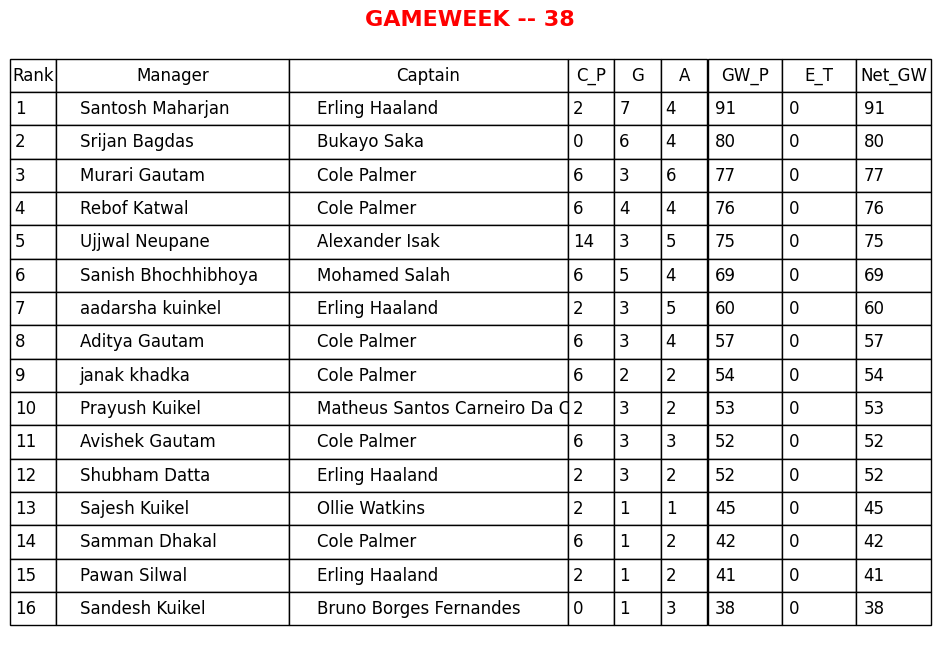

In [3]:
df=df_df_df
path = '/content/drive/MyDrive/fpl_temp/'+str(GW)+'/Gameweek'+str(GW)+'.csv'
df.to_csv(path)


#Create a figure and axis

# Define custom column widths
col_widths = [0.05,0.25,0.3,0.05,0.05,0.05,0.08,0.08,0.08]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
fig.set_facecolor('white')
# Hide axes
ax.axis('off')

# Create a table using the table() function with colWidths parameter
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='left',
    loc='center',
    colWidths=col_widths
)

# Format the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)


title = ax.set_title("Gameweek -- "+str(GW), fontweight="bold", fontsize=16,color = 'red')
title.set_text(title.get_text().upper())
import os
import matplotlib.pyplot as plt

# Define the directory path
directory = '/content/drive/MyDrive/fpl_temp/Output'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the full file path
file_path = os.path.join(directory, 'Gameweek' + str(GW) + '.png')

# Save the plot to the specified path
plt.savefig(file_path, dpi=300)
